In [22]:
import pyspark
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
conda install -c conda-forge findspark

^C

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install dpkt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install asterix

Note: you may need to restart the kernel to use updated packages.


In [ ]:
C:\Program Files (x86)\Expat 2.2.10\Source\lib\expat.h

In [3]:
pip install asterix-decoder

  Using cached asterix_decoder-0.6.1.tar.gz (240 kB)
  Running setup.py clean for asterix-decoder
Failed to build asterix-decoder
    Running setup.py install for asterix-decoder: started
    Running setup.py install for asterix-decoder: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\antoi\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\antoi\\AppData\\Local\\Temp\\pip-install-r_7o26l2\\asterix-decoder\\setup.py'"'"'; __file__='"'"'C:\\Users\\antoi\\AppData\\Local\\Temp\\pip-install-r_7o26l2\\asterix-decoder\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\antoi\AppData\Local\Temp\pip-wheel-j5yc88be'
       cwd: C:\Users\antoi\AppData\Local\Temp\pip-install-r_7o26l2\asterix-decoder\
  Complete output (80 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\asterix
  copying asterix\version.py -> build\lib.win-amd64-3.8\asterix
  copying asterix\__init__.py -> build\lib.win-amd64-3.8\asterix
  running egg_

ERROR: Command errored out with exit status 1: 'C:\Users\antoi\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\antoi\\AppData\\Local\\Temp\\pip-install-r_7o26l2\\asterix-decoder\\setup.py'"'"'; __file__='"'"'C:\\Users\\antoi\\AppData\\Local\\Temp\\pip-install-r_7o26l2\\asterix-decoder\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\antoi\AppData\Local\Temp\pip-record-f3e3brck\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\antoi\anaconda3\Include\asterix-decoder' Check the logs for full command output.


In [7]:
conda install asterix-decoder

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - asterix-decoder

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [5]:
from asterix_decoder-0.6.1 import asterix

SyntaxError: invalid syntax (<ipython-input-5-cf7c84edbb0f>, line 1)

In [3]:
#!/usr/bin/env python

import os
import dpkt
import time
import datetime
import socket
from dpkt.compat import compat_ord
#import asterix
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle 

In [9]:
#!/usr/bin/env python

import os
import dpkt
import time
import datetime
import socket
from dpkt.compat import compat_ord
import asterix
import pandas
import matplotlib.pyplot as plt
import sys
import pickle 

"""
try :
  fichierarg = sys.argv[1]
except IndexError :
  print "Il faut rentrer les donnees a utiliser en argument 1 !"
  exit ()
"""

def mac_addr(address):
    """Convert a MAC address to a readable/printable string
       Args:
           address (str): a MAC address in hex form (e.g. '\x01\x02\x03\x04\x05\x06')
       Returns:
           str: Printable/readable MAC address
    """
    return ':'.join('%02x' % compat_ord(b) for b in address)


def moyenne(liste):
    return somme(liste)/len(liste)

list_fichier=[]
list_fichier.append('2020-09-04-2225.pcap')

if __name__ == '__main__':

    for file in list_fichier:
        TID=[]
        TS=[]
        ToD=[]
        SRC=[]
        DST=[]
        SAC=[]
        SIC=[]
        CAT=[]
        TN=[]
        RHO=[]
        THETA=[]
        FL=[]
        CGS=[]
        CHdg=[]
        print('--- Etude de '+ file + '---')
        fichier=file
        f=open(fichier,"rb")
        pcap=dpkt.pcap.Reader(f)
        compteur = 0
        for ts, buf in pcap:
            compteur = compteur + 1
            if compteur % 10000 == 0:
                print(compteur / 10000)
            eth=dpkt.ethernet.Ethernet(buf)
            dst=mac_addr(eth.dst)
            if dst and dst.startswith("01:00:5e:50:00") and dst.find("\n") == -1 and dst.find("\r") == -1:
            #if dst != "01:00:5e:50:00:26" : 
            #if dst == "01:00:5e:50:00:16" :
                #print(dst)
                try:
                    data=eth.data.data.data
                except: 
                    data=eth.data.data
                parsed=asterix.parse(data)
                l=len(parsed)
                i=0
                while i<l:
                    c=parsed[i]['category']
                    try:
                        CAT.append(c)
                    except:
                        CAT.append('NaN')
                    if c!=-1:
                    #if c==48:
                        TS.append(ts)
                        DST.append(dst)
                        try:
                            tid=parsed[i]['I240']['TId']['val']
                            TID.append(tid)
                        except:
                            TID.append('NaN')
                        try:
                            src=mac_addr(eth.src)
                            SRC.append(src)
                        except:
                            SRC.append('NaN')
                        try:
                            sac=parsed[i]['I010']['SAC']['val']
                            SAC.append(sac)
                        except:
                            SAC.append('NaN')
                        try:
                            sic=parsed[i]['I010']['SIC']['val']
                            SIC.append(sic)
                        except:
                            SIC.append('NaN')
                        try:
                            tod=parsed[i]['I140']['ToD']['val']
                            ToD.append(tod)
                        except:
                            ToD.append('NaN')
                        try:
                            tn=parsed[i]['I161']['Tn']['val']
                            TN.append(tn)
                        except:
                            TN.append('NaN')
                        try:
                            theta=parsed[i]['I040']['THETA']['val']
                            THETA.append(theta)
                        except:
                            THETA.append('NaN')
                        try:
                            rho=parsed[i]['I040']['RHO']['val']
                            RHO.appenotnd(rho)
                        except:
                            RHO.append('NaN')
                        try:
                            fl=parsed[i]['I090']['FL']['val']
                            FL.append(fl)
                        except:
                            FL.append('NaN')
                        try:
                            cgs=parsed[i]['I200']['CGS']['val']
                            CGS.append(cgs)
                        except:
                            CGS.append('NaN')
                        try:
                            chdg=parsed[i]['I200']['CHdg']['val']
                            CHdg.append(chdg)
                        except:
                            CHdg.append('NaN')
                    else:
                        pass
                    i=i+1
                else:
                    pass
                
        d={'SRC': SRC, 'CAT': CAT, 'TID': TID, 'TS': TS, 'DST':DST, 'SAC':SAC, 'SIC':SIC, 'ToD': ToD, 'TN': TN, 'THETA': THETA, 'RHO': RHO, 'FL': FL, 'CGS':CGS, 'CHdg': CHdg}
        df=pandas.DataFrame(data=d, index=TS)
        enregistrement=file.replace('.pcap','')+'.csv'  
        df.to_csv (enregistrement, index = None, header=True)

        print('---Fin de l etude de '+ file +'---')



--- Etude de 2020-09-04-2225.pcap---


AttributeError: module 'asterix' has no attribute 'parse'

In [7]:
pandas.read_csv('2020-09-04-2225.csv')

,SRC,CAT,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
0,00:23:9c:c1:94:5f,48,VLG8657,1.599251e+09,01:00:5e:50:00:16,8.0,5.0,73522.101562,1048.0,81.216431,NaN,390.0,435.278320,223.829956
1,00:23:9c:c1:94:5f,34,NaN,1.599251e+09,01:00:5e:50:00:16,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00:23:9c:c1:94:5f,48,WZZ2494,1.599251e+09,01:00:5e:50:00:16,8.0,5.0,73522.171875,209.0,99.662476,NaN,NaN,485.375977,59.837036
3,00:23:9c:c1:94:5f,34,NaN,1.599251e+09,01:00:5e:50:00:16,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00:23:9c:c1:94:5f,2,NaN,1.599251e+09,01:00:5e:50:00:cc,8.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537963,00:23:9c:c1:94:5f,34,NaN,1.599266e+09,01:00:5e:50:00:0a,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3537964,00:23:9c:c1:94:5f,48,TOM327,1.599266e+09,01:00:5e:50:00:06,8.0,1.0,1522.617188,1894.0,30.563965,NaN,380.0,381.445312,284.765625
3537965,00:23:9c:c1:94:5f,34,NaN,1.599266e+09,01:00:5e:50:00:06,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3537966,00:23:9c:c1:94:5f,34,NaN,1.599266e+09,01:00:5e:50:00:da,8.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#type(pd.read_csv('2020-09-04-2225.csv')['SRC'][0]) #str
#type(pd.read_csv('2020-09-04-2225.csv')['CAT'][0]) #int
#type(pd.read_csv('2020-09-04-2225.csv')['TID'][0]) #str
#type(pd.read_csv('2020-09-04-2225.csv')['TS'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['DST'][0]) #str
#type(pd.read_csv('2020-09-04-2225.csv')['SAC'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['SIC'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['ToD'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['TN'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['THETA'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['RHO'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['FL'][0]) #float 
#type(pd.read_csv('2020-09-04-2225.csv')['CGS'][0]) #float
#type(pd.read_csv('2020-09-04-2225.csv')['CHdg'][0]) #float

numpy.float64

In [5]:
pd.read_csv('2020-09-04-2225.csv').groupby('SAC').size()

SAC
0.0      337
1.0      197
2.0       15
3.0        6
4.0       12
        ... 
242.0      5
243.0      2
245.0      3
248.0      2
252.0      1
Length: 84, dtype: int64

In [6]:
pd.read_csv('2020-09-04-2225.csv').groupby('SIC').size()

SIC
0.0          18
1.0      149716
2.0      114119
3.0      149797
4.0      164546
          ...  
250.0       149
251.0         1
252.0         2
254.0         1
255.0         1
Length: 196, dtype: int64

In [7]:
pd.read_csv('2020-09-04-2225.csv').groupby('ToD').size()

ToD
0.039062        2
0.156250        1
0.179688        1
0.242188        1
0.289062        1
               ..
86399.750000    1
86399.812500    1
86399.890625    1
86399.953125    1
86399.976562    1
Length: 885308, dtype: int64

In [9]:
pd.read_csv('2020-09-04-2225.csv').groupby('TN').size()

TN
1.0       2383
2.0       2487
4.0       3130
5.0       3722
6.0        197
          ... 
2043.0      55
2044.0     645
2045.0     581
2046.0     365
2047.0     595
Length: 1971, dtype: int64

In [10]:
pd.read_csv('2020-09-04-2225.csv').groupby('THETA').size()

THETA
0.000000      24
0.005493      35
0.010986      34
0.016479      23
0.021973      39
              ..
359.972534    24
359.978027    31
359.983521    39
359.989014    19
359.994507    27
Length: 65536, dtype: int64

In [12]:
type(pd.read_csv('2020-09-04-2225.csv').groupby('THETA'))

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
pd.read_csv('2020-09-04-2225.csv').groupby('RHO').size()

Series([], dtype: int64)

In [37]:
pd.read_csv('2020-09-04-2225.csv').groupby('FL').size()

FL
-8.00           3
-3.25          12
-3.00          85
-2.75         251
-2.50         116
            ...  
 490.00     51634
 495.00      1785
 545.00         1
 571.00         1
 1051.00        2
Length: 1738, dtype: int64

In [38]:
pd.read_csv('2020-09-04-2225.csv').groupby('CGS').size()

CGS
0.000000       530
0.219727      1723
0.439453      3389
0.659180      5930
0.878906      7070
              ... 
834.521484       1
838.037109       1
843.969727       1
844.848633       1
864.624023       2
Length: 3024, dtype: int64

In [39]:
pd.read_csv('2020-09-04-2225.csv').groupby('CHdg').size()

CHdg
0.000000      233
0.005493       35
0.010986       31
0.016479       30
0.021973       27
             ... 
359.972534     35
359.978027     23
359.983521     38
359.989014     26
359.994507     34
Length: 65466, dtype: int64

In [3]:
df_all = pd.read_csv('2020-09-04-2225.csv')

In [68]:
df_all.groupby('TID').nunique()

,SRC,CAT,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
TID,,,,,,,,,,,,,
,1,1,128,9,1,9,128,19,121,0,16,74,108
7014,1,1,276,1,1,1,276,5,270,0,100,111,256
9AJIP,1,1,592,4,1,4,592,5,585,0,426,338,468
ABR1255,1,1,2398,9,1,9,2386,9,2282,0,664,684,1668
ABR1483,1,1,104,2,1,2,104,2,102,0,96,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WZZ982,1,1,869,4,1,4,869,4,858,0,130,233,465
XGO3MN,1,1,6161,17,1,17,6123,18,5665,0,955,781,3058
XK157KE,1,1,235,3,1,3,235,3,225,0,190,183,194


In [52]:
df_all.groupby('TID').nunique()['TS']

TID
             128
7014         276
9AJIP        592
ABR1255     2398
ABR1483      104
            ... 
WZZ982       869
XGO3MN      6161
XK157KE      235
XK205XG      466
XK257LC      416
Name: TS, Length: 843, dtype: int64

In [8]:
pandas.read_csv('2020-09-04-2225.csv').groupby('SRC').size()

SRC
00:23:9c:c1:94:5f    3537968
dtype: int64

In [10]:
len(pandas.read_csv('2020-09-04-2225.csv').groupby('DST').size())

21

In [12]:
pandas.read_csv('2020-09-04-2225.csv').groupby('TID').nunique()

,SRC,CAT,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
TID,,,,,,,,,,,,,,
,1,1,1,128,9,1,9,128,19,121,0,16,74,108
7014,1,1,1,276,1,1,1,276,5,270,0,100,111,256
9AJIP,1,1,1,592,4,1,4,592,5,585,0,426,338,468
ABR1255,1,1,1,2398,9,1,9,2386,9,2282,0,664,684,1668
ABR1483,1,1,1,104,2,1,2,104,2,102,0,96,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WZZ982,1,1,1,869,4,1,4,869,4,858,0,130,233,465
XGO3MN,1,1,1,6161,17,1,17,6123,18,5665,0,955,781,3058
XK157KE,1,1,1,235,3,1,3,235,3,225,0,190,183,194


In [5]:
def getPacketsByPlane(tid):
    return df_all.loc[df_all['TID'].str.strip() == tid]

In [46]:
getPacketsByPlane('FRF300')

,SRC,CAT,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
823,00:23:9c:c1:94:5f,48,FRF300,1.599251e+09,01:00:5e:50:00:52,8.0,20.0,73524.085938,548.0,173.100586,NaN,158.5,180.395508,160.208130
858,00:23:9c:c1:94:5f,48,FRF300,1.599251e+09,01:00:5e:50:00:66,8.0,25.0,73524.242188,695.0,60.792847,NaN,158.5,174.682617,158.499756
909,00:23:9c:c1:94:5f,48,FRF300,1.599251e+09,01:00:5e:50:00:06,8.0,1.0,73523.914062,1610.0,260.018921,NaN,158.5,179.956055,162.993164
1302,00:23:9c:c1:94:5f,48,FRF300,1.599251e+09,01:00:5e:50:00:da,8.0,54.0,73525.648438,1258.0,184.603271,NaN,158.5,177.099609,162.487793
1348,00:23:9c:c1:94:5f,48,FRF300,1.599251e+09,01:00:5e:50:00:8e,8.0,35.0,73525.726562,197.0,340.098267,NaN,158.5,180.395508,162.103271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440249,00:23:9c:c1:94:5f,48,FRF300,1.599259e+09,01:00:5e:50:00:22,8.0,8.0,81870.984375,1666.0,156.862793,NaN,NaN,242.358398,147.771606
2441290,00:23:9c:c1:94:5f,48,FRF300,1.599259e+09,01:00:5e:50:00:22,8.0,8.0,81875.984375,1666.0,156.851807,NaN,NaN,242.358398,147.771606
2442286,00:23:9c:c1:94:5f,48,FRF300,1.599259e+09,01:00:5e:50:00:22,8.0,8.0,81881.054688,1666.0,156.807861,NaN,250.0,242.358398,146.008301
2443306,00:23:9c:c1:94:5f,48,FRF300,1.599259e+09,01:00:5e:50:00:22,8.0,8.0,81886.046875,1666.0,156.851807,NaN,250.0,239.282227,148.002319


In [65]:
getPacketsByPlane('XGO3MN').groupby('RHO').size()

Series([], dtype: int64)

In [32]:
getPacketsByPlane('XGO3MN').groupby('TID').nunique()

,SRC,CAT,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
TID,,,,,,,,,,,,,,
XGO3MN,1,1,1,6161,17,1,17,6123,18,5665,0,955,781,3058


In [52]:
getPacketsByPlane('XGO3MN').groupby('DST').nunique().sort_values('TS', ascending = False)

,SRC,CAT,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
DST,,,,,,,,,,,,,,
01:00:5e:50:00:8e,1,1,1,746,1,1,1,746,1,618,0,221,256,639
01:00:5e:50:00:12,1,1,1,557,1,1,1,557,1,557,0,135,202,463
01:00:5e:50:00:16,1,1,1,539,1,1,1,539,1,430,0,210,252,477
01:00:5e:50:00:22,1,1,1,465,1,1,1,465,1,465,0,308,325,425
01:00:5e:50:00:5e,1,1,1,454,1,1,1,454,2,448,0,165,249,405
01:00:5e:50:00:a6,1,1,1,447,1,1,1,447,1,436,0,266,259,388
01:00:5e:50:00:1a,1,1,1,447,1,1,1,447,1,446,0,21,198,349
01:00:5e:50:00:46,1,1,1,375,1,1,1,375,1,375,0,24,144,321
01:00:5e:50:00:4a,1,1,1,367,1,1,1,367,1,367,0,1,67,157


In [9]:
def filterByRadar(df, dst):
    return df.loc[df['DST'].str.strip() == dst]
    

In [10]:
filterByRadar(getPacketsByPlane('XGO3MN'), list(getPacketsByPlane('XGO3MN').groupby('DST').size().index)[0]).groupby('DST').size()

DST
01:00:5e:50:00:06    216
dtype: int64

In [11]:
def dictRadarsByAvion(TID):
    df_temp = getPacketsByPlane(TID)
    list_radar = list(df_temp.groupby('DST').size().index)
    dictRadar = {}
    for dst in list_radar:
        dictRadar[dst] = filterByRadar(df_temp, dst)
    return dictRadar

In [28]:
dictRadarsByAvion('XGO3MN')['01:00:5e:50:00:06']

,SRC,CAT,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
908,00:23:9c:c1:94:5f,48,XGO3MN,1.599251e+09,01:00:5e:50:00:06,8.0,1.0,73523.921875,557.0,260.359497,NaN,370.0,384.960938,158.543701
4084,00:23:9c:c1:94:5f,48,XGO3MN,1.599251e+09,01:00:5e:50:00:06,8.0,1.0,73531.992188,557.0,259.980469,NaN,370.0,382.983398,158.494263
7274,00:23:9c:c1:94:5f,48,XGO3MN,1.599251e+09,01:00:5e:50:00:06,8.0,1.0,73540.039062,557.0,259.661865,NaN,370.0,377.929688,158.356934
10471,00:23:9c:c1:94:5f,48,XGO3MN,1.599251e+09,01:00:5e:50:00:06,8.0,1.0,73548.093750,557.0,259.211426,NaN,370.0,375.952148,158.598633
13631,00:23:9c:c1:94:5f,48,XGO3MN,1.599251e+09,01:00:5e:50:00:06,8.0,1.0,73556.156250,557.0,258.760986,NaN,370.0,378.808594,158.554688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641186,00:23:9c:c1:94:5f,48,XGO3MN,1.599253e+09,01:00:5e:50:00:06,8.0,1.0,75222.851562,557.0,192.952881,NaN,370.0,395.068359,149.650269
649892,00:23:9c:c1:94:5f,48,XGO3MN,1.599253e+09,01:00:5e:50:00:06,8.0,1.0,75247.015625,557.0,192.414551,NaN,370.0,396.606445,148.936157
652748,00:23:9c:c1:94:5f,48,XGO3MN,1.599253e+09,01:00:5e:50:00:06,8.0,1.0,75255.070312,557.0,192.238770,NaN,370.0,397.924805,149.057007
655645,00:23:9c:c1:94:5f,48,XGO3MN,1.599253e+09,01:00:5e:50:00:06,8.0,1.0,75263.101562,557.0,192.183838,NaN,370.0,395.288086,150.529175


In [42]:
dictRadarsByAvion('XGO3MN')['01:00:5e:50:00:06']['FL']

908       370.0
4084      370.0
7274      370.0
10471     370.0
13631     370.0
          ...  
641186    370.0
649892    370.0
652748    370.0
655645    370.0
658529    370.0
Name: FL, Length: 216, dtype: float64

In [13]:
import colorsys
import random
colorsys.hsv_to_rgb(359,100,100)
def randomColor(i, m):
    return rgb_to_hex(colorsys.hsv_to_rgb(float(i) / float(m), 1, 1))
def rgb_to_hex(rgb):
    rgbInt = (int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))
    return '#%02x%02x%02x' % rgbInt

In [123]:
list(dictRadarsByAvion('XGO3MN')['01:00:5e:50:00:12'].columns)

['SRC',
 'CAT',
 'TID',
 'TS',
 'DST',
 'SAC',
 'SIC',
 'ToD',
 'TN',
 'THETA',
 'RHO',
 'FL',
 'CGS',
 'CHdg']

In [25]:
type(dictRadarsByAvion('XGO3MN'))

dict

In [23]:
def plotRadar(dictRadar, var=None):
        if var == None:
            for var in list(dictRadar[list(dictRadar.keys())[0]].columns):
                i, m = 0, len(dictRadar.keys())
                for dst in dictRadar.keys():
                    plt.plot(dictRadar[dst]['TS'], dictRadar[dst][var], randomColor(i, m))
                    i = i + 1
                plt.xlabel('time(s)')
                plt.ylabel(var)
                plt.show()            
        else:
            i, m = 0, len(dictRadar.keys())
            for dst in dictRadar.keys():
                plt.plot(dictRadar[dst]['TS'], dictRadar[dst][var], randomColor(i, m))
                i = i + 1
            plt.xlabel('time(s)')
            plt.ylabel(var)
            plt.show()       

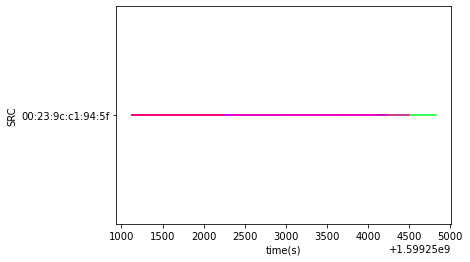

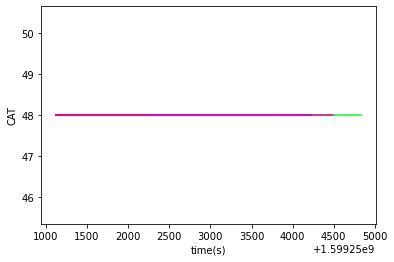

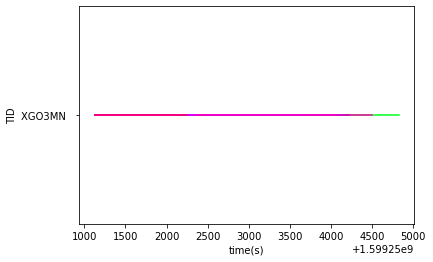

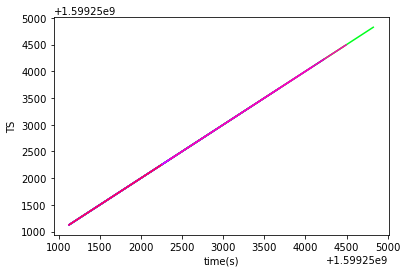

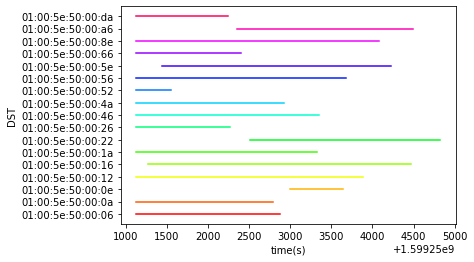

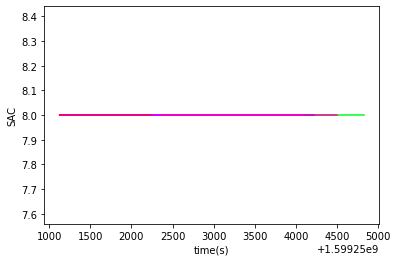

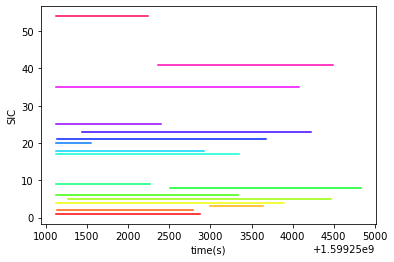

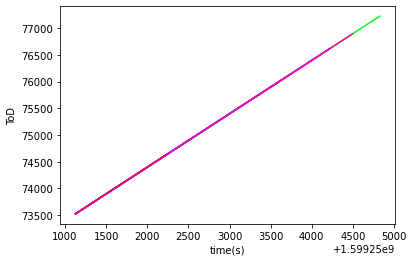

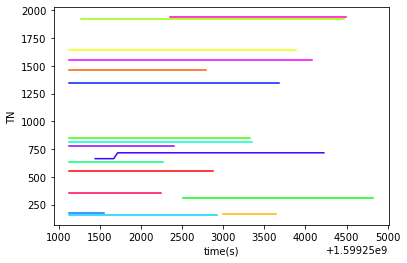

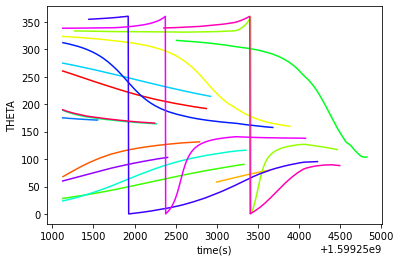

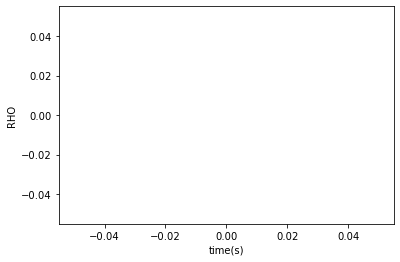

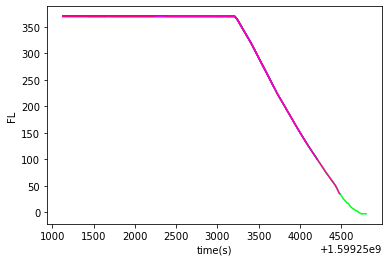

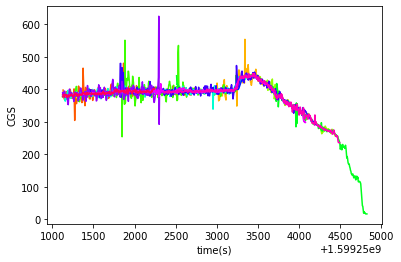

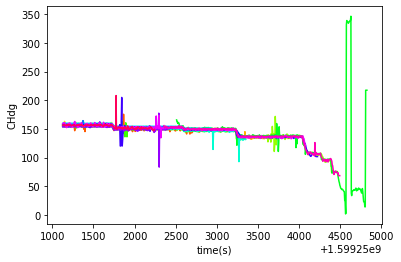

In [24]:
plotRadar(dictRadarsByAvion('XGO3MN'))

In [73]:
b = True
if b:
    print(b)

True


In [20]:
import csv
with open('2020-09-04-2225.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',',quotechar='|')

In [21]:
spamreader

In [22]:
pandas.read_csv('2020-09-04-2225.csv')

,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
0,TRA44R,1.599251e+09,01:00:5e:50:00:26,8,9,73522.445312,884,224.956055,70.066406,400.00,449.121094,7.514648
1,RYR33EY,1.599251e+09,01:00:5e:50:00:26,8,9,73522.515625,1186,229.855957,161.863281,400.00,428.466797,352.194214
2,TRA18V,1.599251e+09,01:00:5e:50:00:26,8,9,73522.453125,51,225.368042,126.636719,400.00,484.497070,24.230347
3,RYR12LQ,1.599251e+09,01:00:5e:50:00:26,8,9,73522.609375,1198,239.721680,127.753906,390.00,364.526367,229.229736
4,SRN151,1.599251e+09,01:00:5e:50:00:26,8,9,73522.664062,1685,243.901978,148.613281,200.00,236.425781,355.193481
...,...,...,...,...,...,...,...,...,...,...,...,...
130979,EXS1504,1.599266e+09,01:00:5e:50:00:26,8,9,1522.070312,1615,31.135254,142.503906,360.00,369.140625,300.091553
130980,EZY32VH,1.599266e+09,01:00:5e:50:00:26,8,9,1522.078125,1047,32.233887,52.660156,360.00,398.583984,301.300049
130981,RYR1991,1.599266e+09,01:00:5e:50:00:26,8,9,1522.148438,332,38.320312,128.949219,380.00,399.243164,301.821899
130982,AEE631,1.599266e+09,01:00:5e:50:00:26,8,9,1522.343750,1183,55.920410,131.500000,390.25,495.703125,116.998901


In [24]:
pandas.read_csv('2020-09-04-2225.csv').describe()

,TS,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
count,1.309840e+05,130984.0,130984.0,130984.000000,130984.000000,130754.000000,130754.000000,128660.000000,130559.000000,130559.000000
mean,1.599256e+09,8.0,9.0,75371.795172,1052.907302,157.905306,108.883697,326.037401,391.356169,204.381872
std,3.659811e+03,0.0,0.0,14745.266614,597.438137,123.598862,48.331990,100.318480,125.872288,116.186584
min,1.599251e+09,8.0,9.0,0.578125,7.000000,0.000000,1.289062,-0.750000,0.219727,0.000000
25%,1.599253e+09,8.0,9.0,75183.123047,574.000000,42.209473,70.562500,287.500000,377.050781,97.704163
50%,1.599255e+09,8.0,9.0,77349.753906,1049.000000,117.528992,123.587891,360.000000,402.099609,261.716309
75%,1.599258e+09,8.0,9.0,80001.615234,1560.000000,282.451630,150.417969,380.000000,471.972656,304.164734
max,1.599266e+09,8.0,9.0,86399.687500,2037.000000,359.994507,178.160156,490.000000,619.628906,359.994507


In [2]:
import seaborn as sns
import pandas

In [44]:
df2=pandas.read_csv('2020-09-04-2225.csv')
df2['TID'].str.strip()

0          TRA44R
1         RYR33EY
2          TRA18V
3         RYR12LQ
4          SRN151
           ...   
130979    EXS1504
130980    EZY32VH
130981    RYR1991
130982     AEE631
130983    EXS96LQ
Name: TID, Length: 130984, dtype: object

In [8]:
df.groupby('TN').nunique()

,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
TN,,,,,,,,,,,
7,266,1,1,1,265,1,265,264,243,224,221
14,504,1,1,1,504,1,501,502,184,173,239
16,12,1,1,1,12,1,10,11,6,11,6
23,124,1,1,1,123,1,121,117,102,113,109
26,299,1,1,1,299,1,298,290,2,112,118
...,...,...,...,...,...,...,...,...,...,...,...
2017,5,1,1,1,5,1,4,4,1,4,1
2027,350,1,1,1,350,1,350,341,273,240,266
2034,554,1,1,1,553,1,527,552,144,222,308


In [24]:
df2.groupby('TID').nunique()

,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
TID,,,,,,,,,,,,
,1,11,1,1,1,11,3,11,11,4,11,6
9AJIP,1,146,1,1,1,146,2,146,132,128,86,112
ABR1255,1,385,1,1,1,385,1,363,385,191,203,333
ABR1623,1,560,1,1,1,560,2,560,557,140,212,331
ABR1737,1,662,1,1,1,662,1,661,652,163,246,276
...,...,...,...,...,...,...,...,...,...,...,...,...
WZZ4465,1,475,1,1,1,475,1,475,465,189,178,255
WZZ51LL,1,406,1,1,1,406,1,406,397,21,173,229
WZZ6634,1,410,1,1,1,410,1,341,410,330,298,313


In [31]:
df['TS']
df['SAC'].dtype

dtype('int64')

In [38]:
df2['TID'][0]

'TRA44R  '

In [58]:
df2.loc[df2['TID'].str.strip() == 'ABR1623']

,TID,TS,DST,SAC,SIC,ToD,TN,THETA,RHO,FL,CGS,CHdg
87034,ABR1623,1.599257e+09,01:00:5e:50:00:26,8,9,79475.156250,579,336.192627,163.554688,103.75,260.815430,116.801147
87085,ABR1623,1.599257e+09,01:00:5e:50:00:26,8,9,79479.265625,579,336.181641,163.246094,105.75,281.689453,128.193970
87136,ABR1623,1.599257e+09,01:00:5e:50:00:26,8,9,79483.375000,579,336.269531,162.937500,107.00,292.675781,128.215942
87187,ABR1623,1.599257e+09,01:00:5e:50:00:26,8,9,79487.476562,579,336.280518,162.625000,108.00,295.751953,131.286621
87240,ABR1623,1.599257e+09,01:00:5e:50:00:26,8,9,79491.593750,579,336.412354,162.292969,108.75,303.222656,129.138794
...,...,...,...,...,...,...,...,...,...,...,...,...
106489,ABR1623,1.599259e+09,01:00:5e:50:00:26,8,9,81868.921875,1845,102.392578,169.996094,350.00,468.676758,144.025269
106511,ABR1623,1.599259e+09,01:00:5e:50:00:26,8,9,81873.015625,1845,102.502441,170.394531,350.00,469.116211,144.190063
106533,ABR1623,1.599259e+09,01:00:5e:50:00:26,8,9,81877.125000,1845,102.590332,170.792969,350.00,469.116211,144.135132
106555,ABR1623,1.599259e+09,01:00:5e:50:00:26,8,9,81881.203125,1845,102.738647,171.199219,350.00,469.775391,144.118652


In [17]:
def getPacketsByPlane(tid):
    return df2.loc[df2['TID'].str.strip() == tid]

In [18]:
def getPacketsByCategory(dst):
    return df2.loc[df2['DST'].str.strip() == dst]

In [19]:
df3=getPacketsByPlane('WZZ4465')

NameError: name 'df2' is not defined

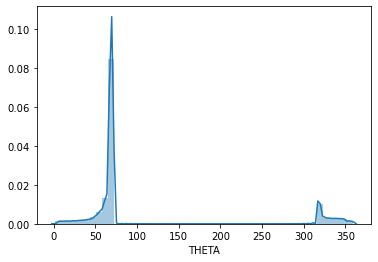

In [51]:
sns.distplot(df3['THETA'])

In [42]:
(max(df['TS']) - min(df['TS']))/3600 # 4h

4.000006992816925

In [53]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
def plot_df(df, x, y, title="", xlabel='TS', ylabel='THETA', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show() 

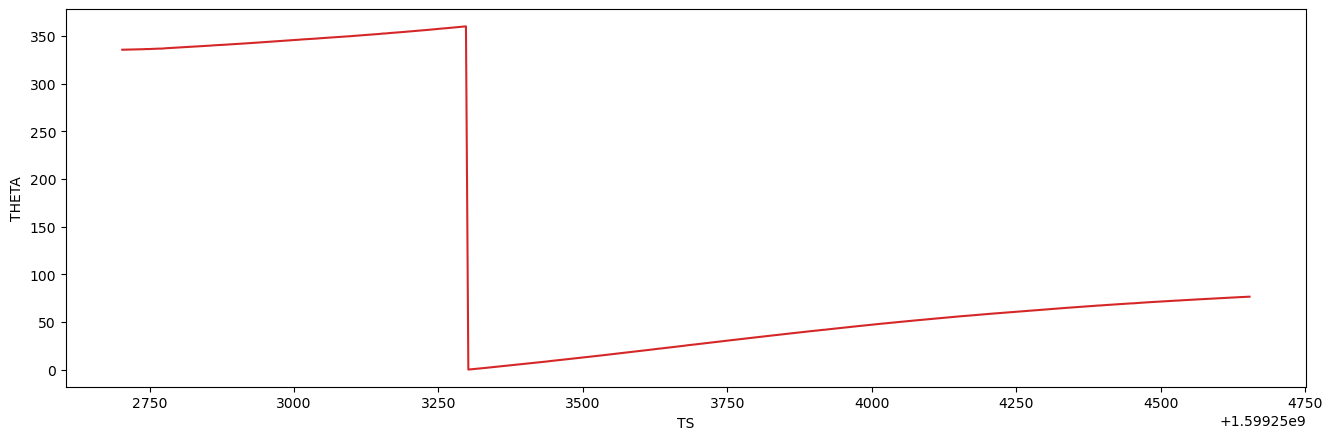

In [63]:
plot_df(df3, x=df3['TS'], y=df3['THETA'])

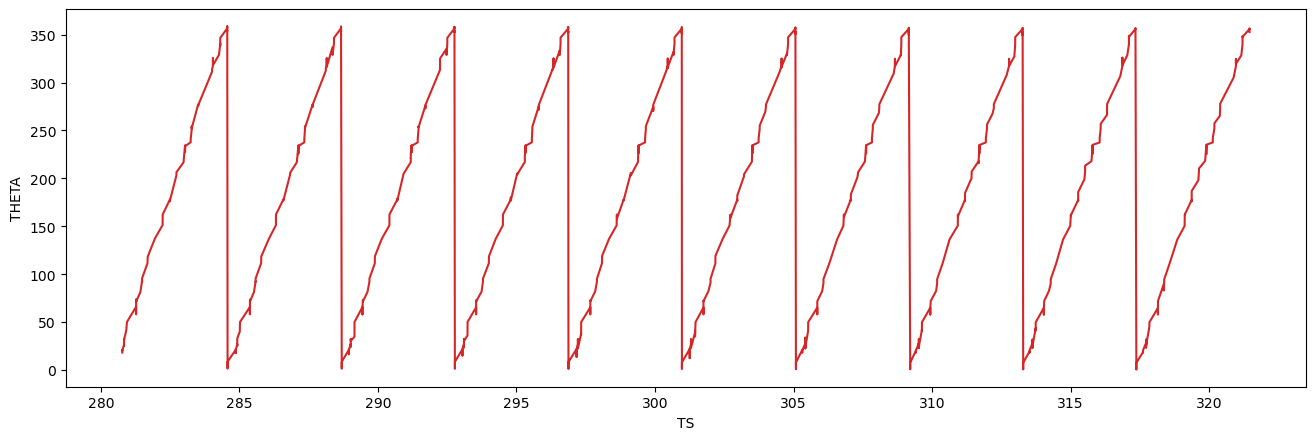

In [132]:
time_min = 4985
time_max = time_min + 690
plot_df(df, x=df['TS'][time_min:time_max] - min(df['TS']), y=df['THETA'][time_min:time_max])   

In [81]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [93]:
df[['TS','THETA']].dropna()

,TS,THETA
0,1.599251e+09,224.956055
1,1.599251e+09,229.855957
2,1.599251e+09,225.368042
3,1.599251e+09,239.721680
4,1.599251e+09,243.901978
...,...,...
130979,1.599266e+09,31.135254
130980,1.599266e+09,32.233887
130981,1.599266e+09,38.320312
130982,1.599266e+09,55.920410


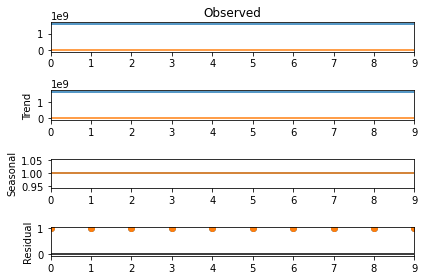

In [101]:
result = seasonal_decompose(df[['TS','THETA']][0:10].dropna().to_numpy(), model='multiplicative', period=1)
result.plot()
pyplot.show()

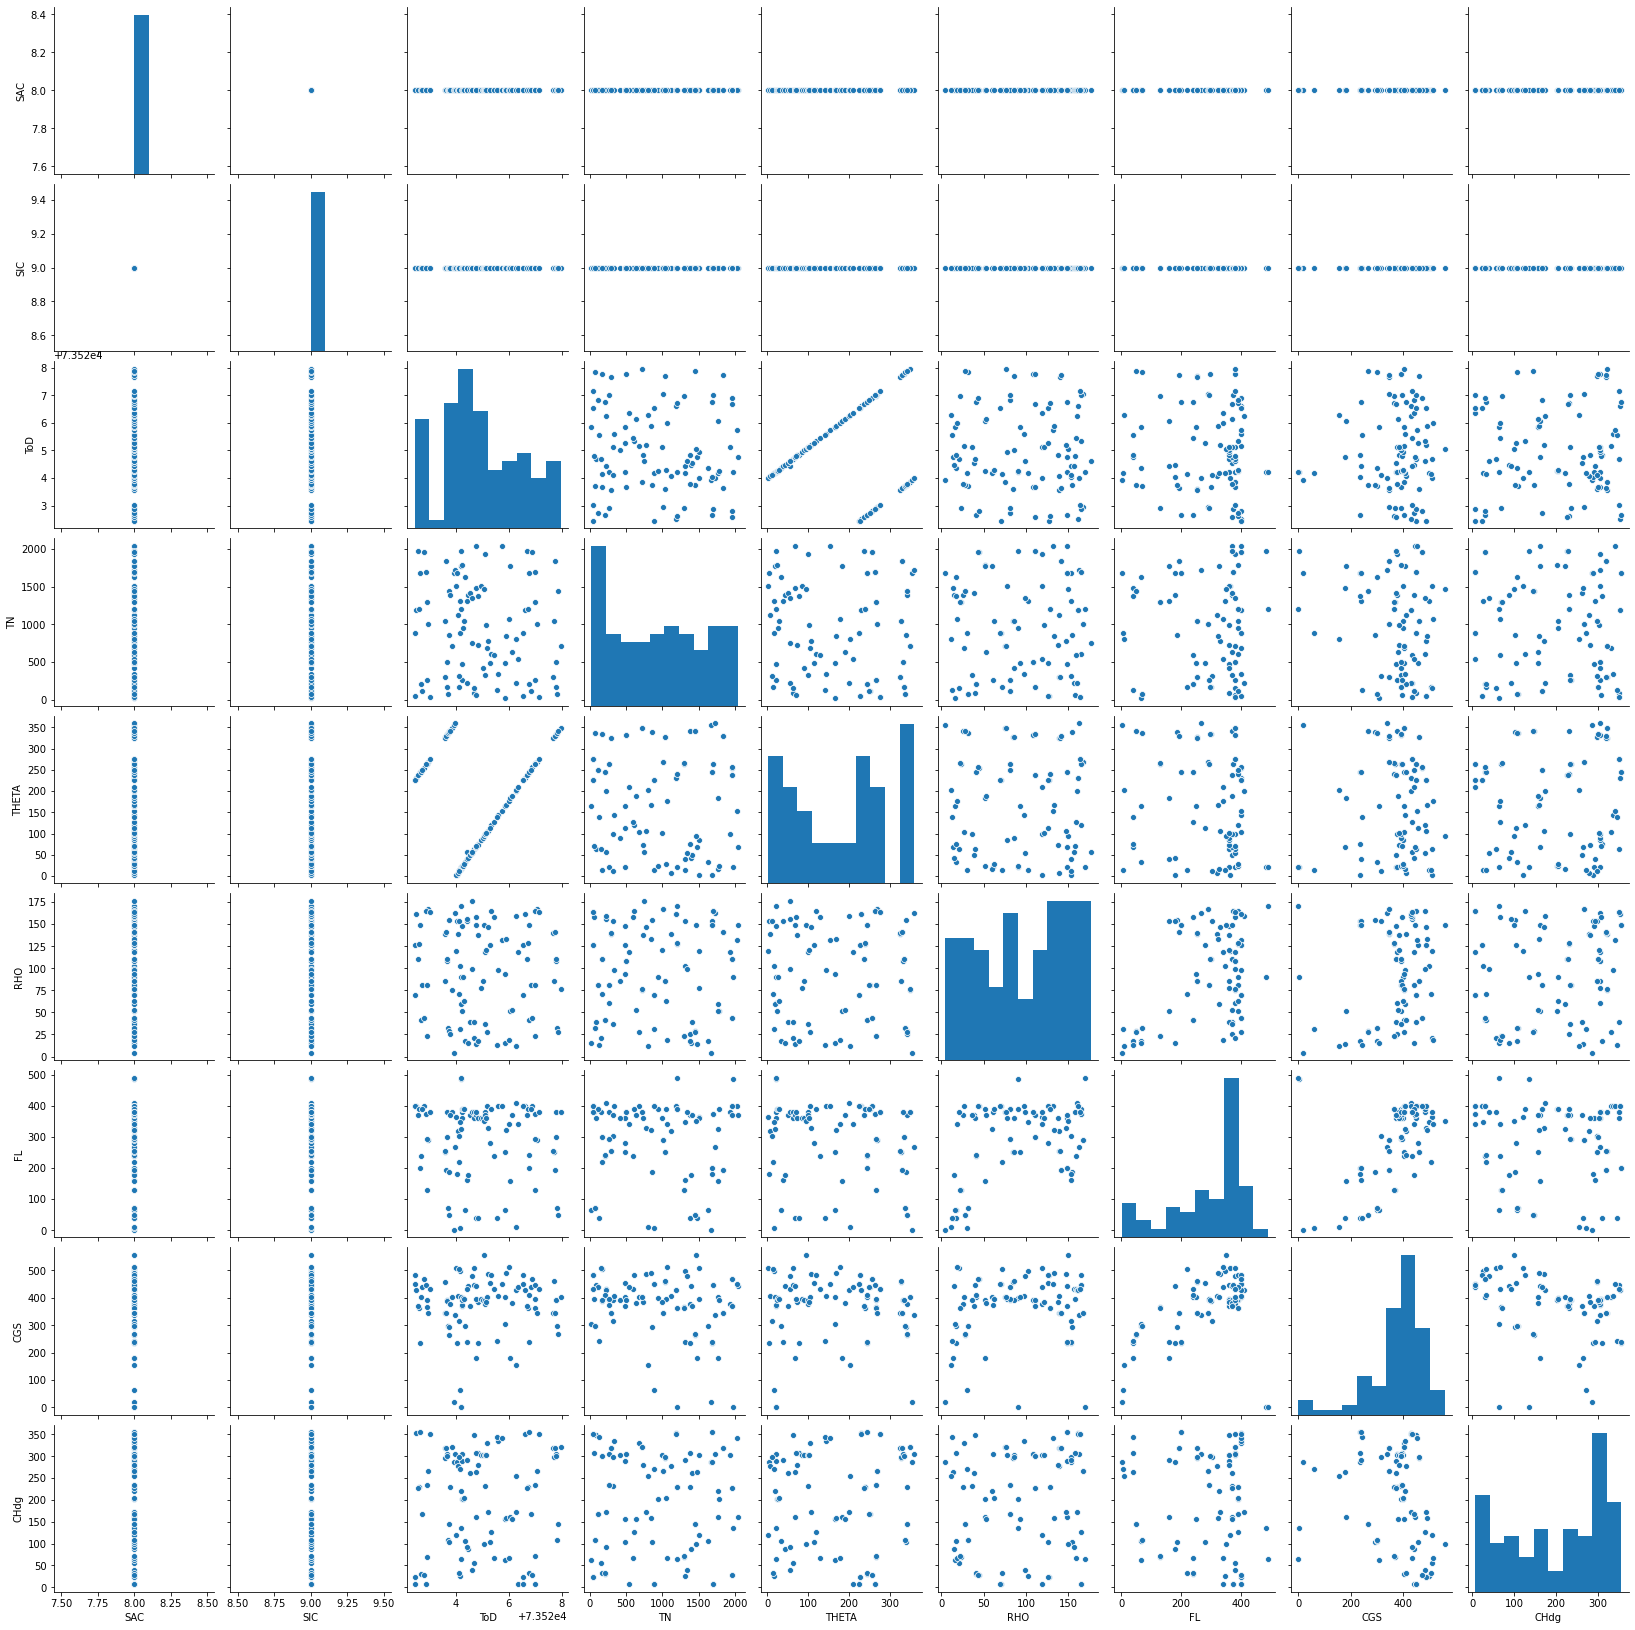

In [136]:
sns.pairplot(data=df[0:100], vars=['SAC', 'SIC', 'ToD', 'TN', 'THETA', 'RHO', 'FL', 'CGS', 'CHdg'])
plt.show()

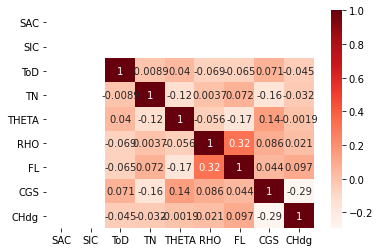

In [139]:
sns.heatmap(data=df[['SAC', 'SIC', 'ToD', 'TN', 'THETA', 'RHO', 'FL', 'CGS', 'CHdg']].corr(), annot = True, cmap = 'Reds')
plt.show()